## Introduction 

In this project, we aim to develop a machine learning model to classify individuals into different obesity risk categories based on various health and lifestyle features. The dataset includes attributes such as age, gender, height, weight, dietary habits, and physical activity. Our objective is to accurately predict the NObeyesdad category, which represents the individual's obesity level. This is a multi-class classification task, and model performance will be assessed using accuracy. The data is synthetically generated to resemble real-world patterns, making it ideal for exploring feature engineering, model training, and evaluation in a controlled setting.

## 1: Imports & Setup

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")


## 2: Load the Data

In [2]:
# Load datasets with personalised variable names
rl_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
rl_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
rl_sub_template = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')


## 3:Understanding the Data

3.1: Basic Overview

In [3]:
## Check Shape & Columns
print("Train shape:", rl_train.shape)
print("Test shape:", rl_test.shape)

print("\nTrain columns:")
print(rl_train.columns.tolist())

Train shape: (20758, 18)
Test shape: (13840, 17)

Train columns:
['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


3.2: Glimpse at the Data

In [4]:
# First few rows
rl_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


3.3: Basic Info

In [5]:
# General data info
rl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

3.4: Missing Values

In [6]:
# Missing value check
rl_train.isnull().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

3.5: Target Variable Distribution

In [7]:
# Target class distribution
rl_train['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: proportion, dtype: float64

This output confirms that NObeyesdad is a multi-class target variable with seven distinct categories representing different obesity risk levels. The distribution is somewhat imbalanced, with Obesity_Type_III being the most frequent and Overweight_Level_I the least. Recognising this class imbalance is important, as it may affect model performance and influence the choice of evaluation metrics.

## 4: Exploratory Data Analysis (EDA)

EDA helps us understand patterns, relationships, and potential issues in the dataset. Before feature engineering or model training, it’s important to visually explore the data to gain insights about the variables, spot anomalies, and see how features relate to the target variable.

4.1: Visualise Target Distribution

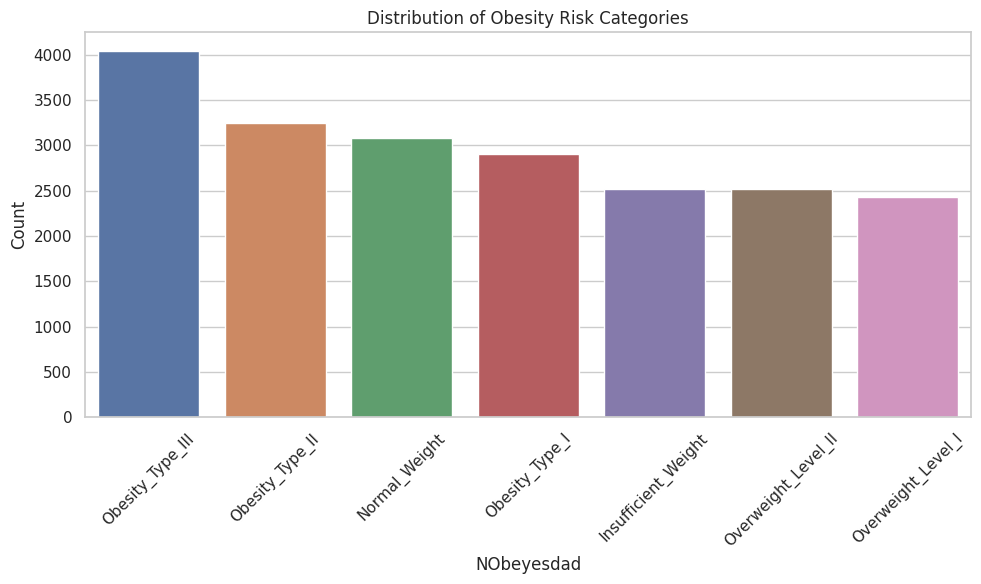

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))
sns.countplot(data=rl_train, x='NObeyesdad', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Risk Categories')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4.2: Feature Distributions by Target

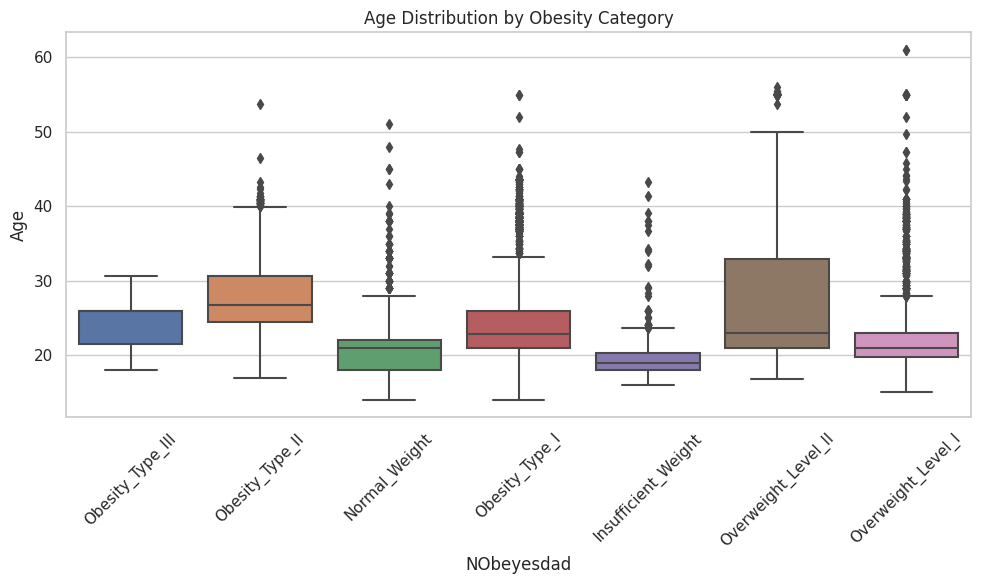

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rl_train, x='NObeyesdad', y='Age', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Age Distribution by Obesity Category')
plt.xlabel('NObeyesdad')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


4.3: Gender vs Obesity Category

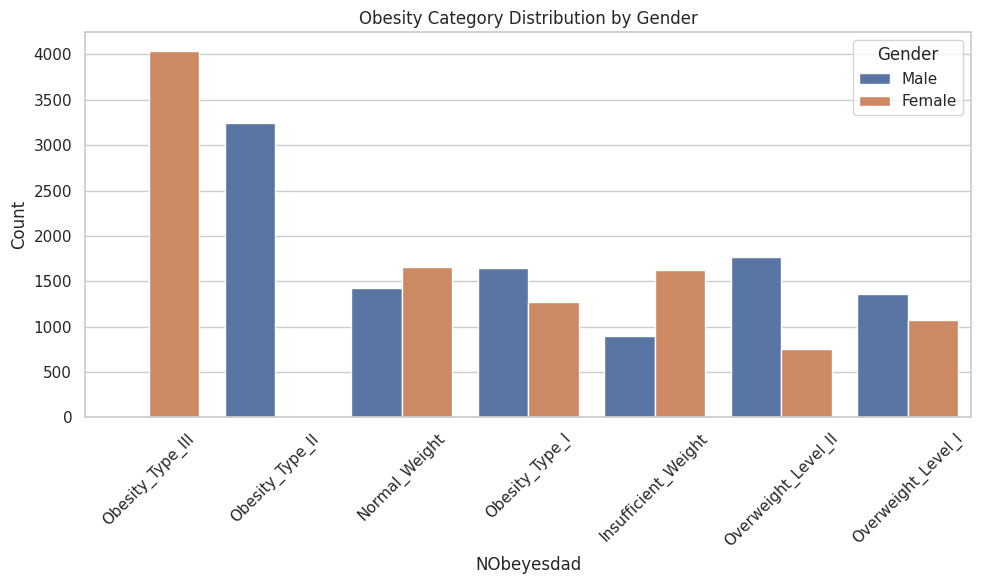

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rl_train, x='NObeyesdad', hue='Gender', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Obesity Category Distribution by Gender')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


4.4: Family History vs Obesity Category

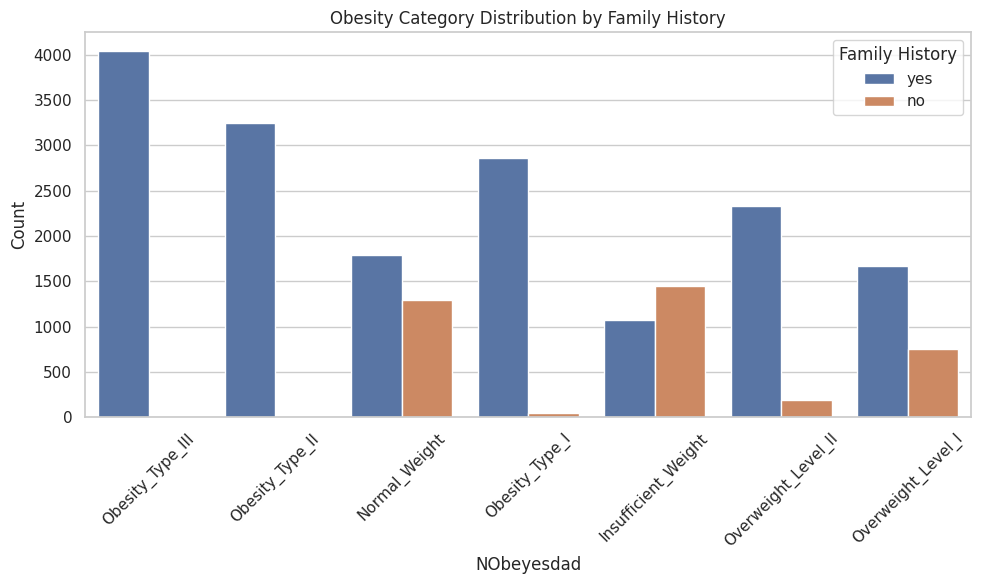

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rl_train, x='NObeyesdad', hue='family_history_with_overweight', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Obesity Category Distribution by Family History')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.tight_layout()
plt.show()


4.5: Correlation Heatmap

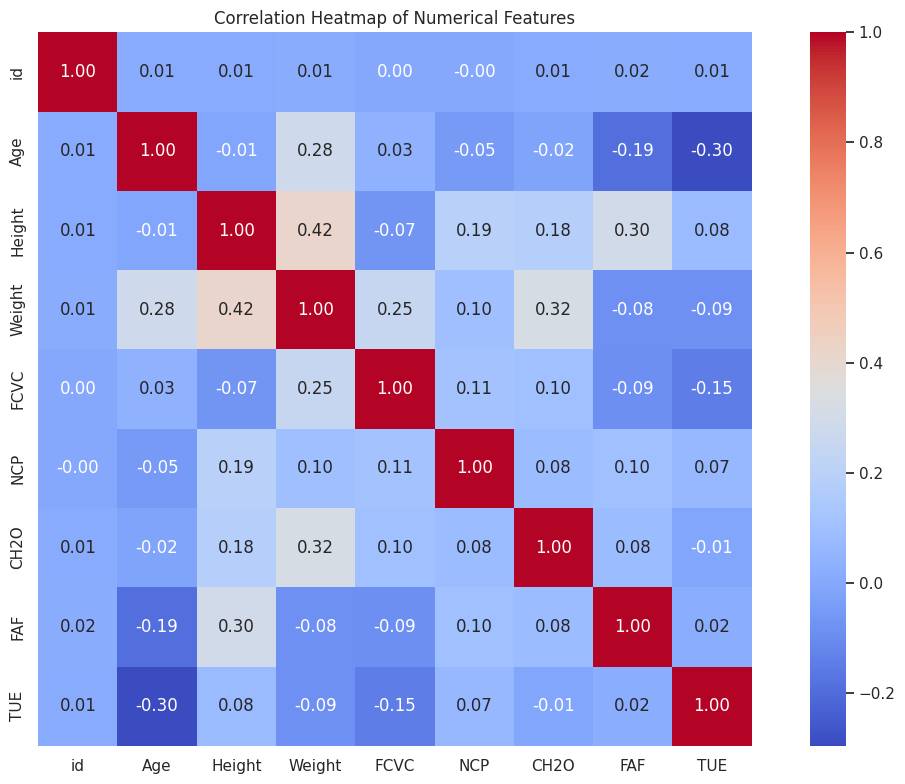

In [12]:
# Select only numeric columns
numeric_cols = rl_train.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


4.6: FCVC (Vegetable Consumption) vs NObeyesdad

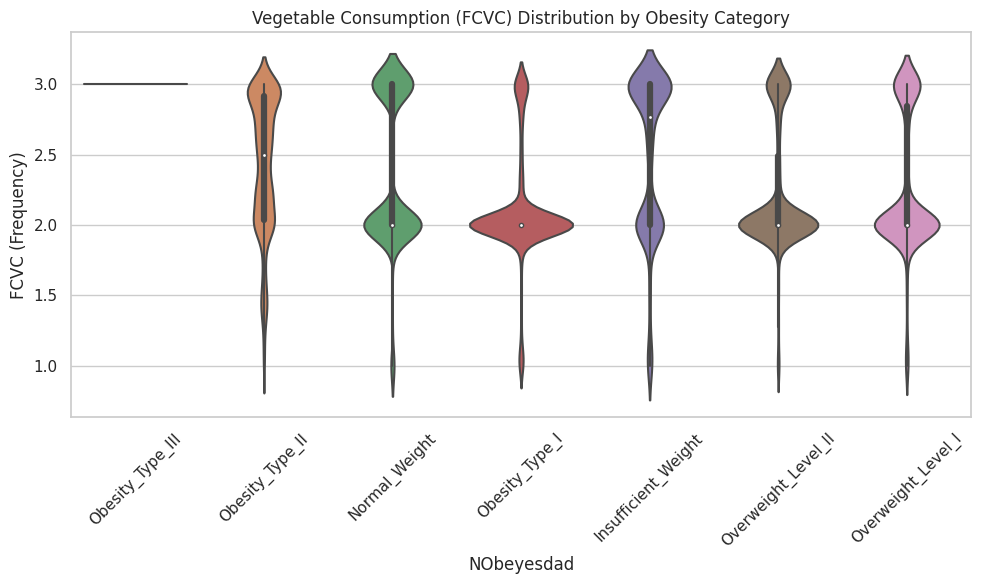

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=rl_train, x='NObeyesdad', y='FCVC', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Vegetable Consumption (FCVC) Distribution by Obesity Category')
plt.xlabel('NObeyesdad')
plt.ylabel('FCVC (Frequency)')
plt.tight_layout()
plt.show()

4.7: MTRANS (Mode of Transport) vs NObeyesdad

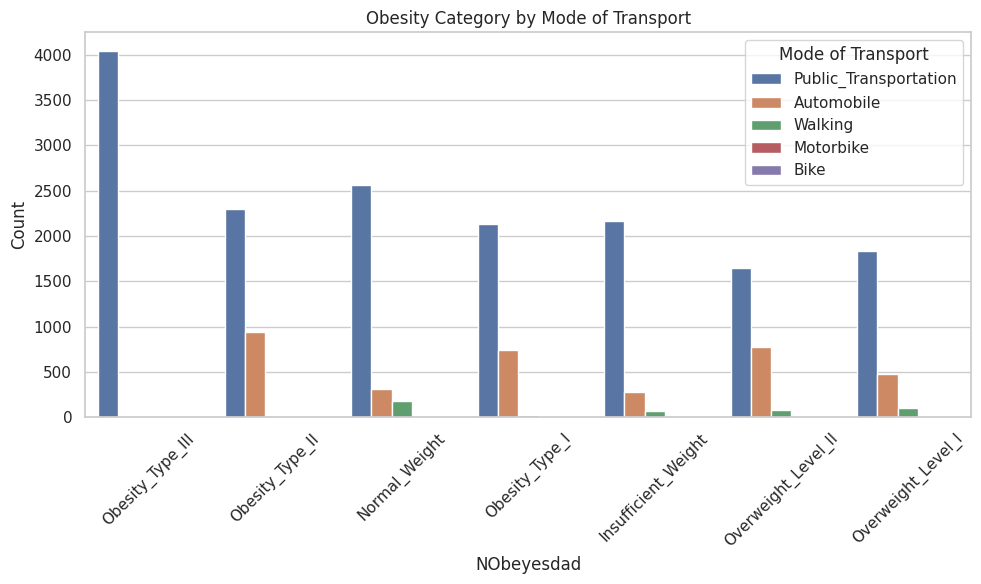

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rl_train, x='NObeyesdad', hue='MTRANS', order=rl_train['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Obesity Category by Mode of Transport')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.legend(title='Mode of Transport')
plt.tight_layout()
plt.show()


4.8: Missing Values Heatmap

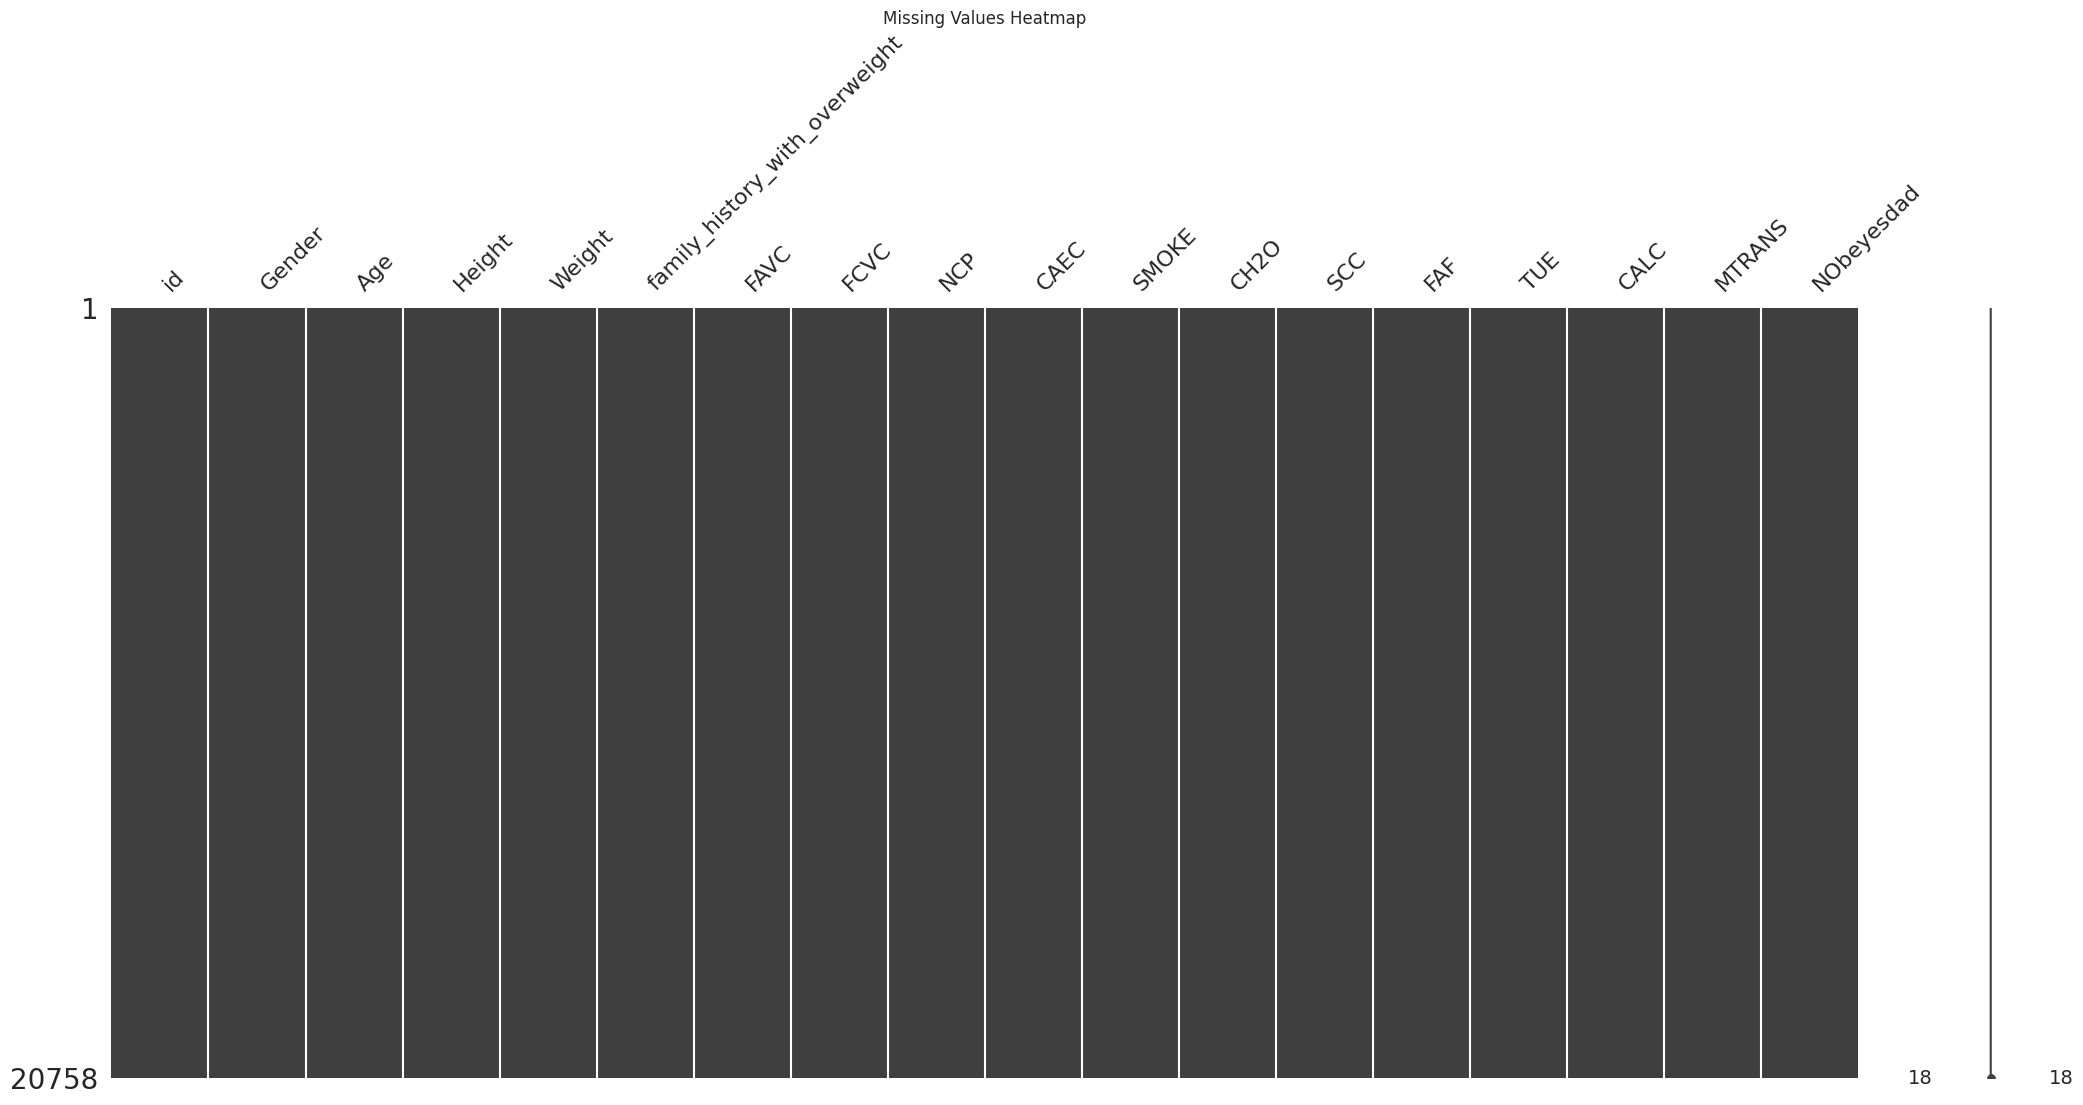

In [15]:
import missingno as msno

# Visualise missing data
msno.matrix(rl_train)
plt.title('Missing Values Heatmap')
plt.show()


The heatmap confirms that there are no missing values in the dataset. While we don’t need to handle nulls or imputation, we still need to preprocess categorical features by encoding them into numerical form before modelling.


## 5: Data Preprocessing, Cleaning & Feature Engineering

 5.1: Identify Categorical Features

In [16]:
# Identify categorical features
categorical_cols = rl_train.select_dtypes(include='object').columns.tolist()

# Drop target from that list (we encode it separately)
categorical_cols.remove('NObeyesdad')

print("Categorical Features:", categorical_cols)


Categorical Features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


5.2: Encode Categorical Features

In [17]:
## Step 1: Tag the data so we can combine and split cleanly later
rl_train['source'] = 'train'
rl_test['source'] = 'test'

# Combine both datasets
combined = pd.concat([rl_train, rl_test], axis=0)


In [18]:
# One-hot encode the 8 categorical features
combined_encoded = pd.get_dummies(combined, columns=categorical_cols)

In [19]:
# Separate back the encoded train and test data
rl_train_encoded = combined_encoded[combined_encoded['source'] == 'train'].drop(['source'], axis=1)
rl_test_encoded = combined_encoded[combined_encoded['source'] == 'test'].drop(['source', 'NObeyesdad'], axis=1)


In [20]:
rl_train_encoded.dtypes.value_counts()

bool       23
float64     8
int64       1
object      1
Name: count, dtype: int64

In [21]:
rl_train_encoded.dtypes[rl_train_encoded.dtypes == 'object']

NObeyesdad    object
dtype: object

5.3: Encode the Target Variable

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create and apply the encoder
target_encoder = LabelEncoder()
rl_train_encoded['target'] = target_encoder.fit_transform(rl_train_encoded['NObeyesdad'])

# Optional: drop the original text column now
rl_train_encoded = rl_train_encoded.drop(columns=['NObeyesdad'])

# Preview the classes
print("Encoded target classes:")
for i, label in enumerate(target_encoder.classes_):
    print(f"{i}: {label}")


Encoded target classes:
0: Insufficient_Weight
1: Normal_Weight
2: Obesity_Type_I
3: Obesity_Type_II
4: Obesity_Type_III
5: Overweight_Level_I
6: Overweight_Level_II


We preprocessed the dataset by one-hot encoding all categorical features and label-encoding the target variable `NObeyesdad`. The data was verified to have no missing values, and all columns are now numeric. The dataset is clean and ready for model training.


## 6 :Model Training (Baseline Model)

6.1: Split Data for Training & Validation

In [23]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = rl_train_encoded.drop(columns=['id', 'target'], errors='ignore')
y = rl_train_encoded['target']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


6.2: Train Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialise the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=target_encoder.classes_))


Validation Accuracy: 0.8897

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93       505
      Normal_Weight       0.82      0.86      0.84       617
     Obesity_Type_I       0.88      0.89      0.89       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.78      0.70      0.74       485
Overweight_Level_II       0.77      0.79      0.78       504

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



## 7: Model Optimization

7.1: Hyperparameter Tuning

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create a base Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the grid search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Show the best parameters and accuracy score
print("✅ Best Hyperparameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
✅ Best Cross-Validated Accuracy: 0.8893


### Trying Alternative Models

After tuning the Random Forest classifier, we observed that the cross-validated accuracy remained around 88.9%, suggesting we may have reached its performance ceiling. To explore potential improvements, we now evaluate alternative models like XGBoost, which often perform well on structured, multi-class classification tasks.


 ## 8: Advanced Model Testing

8.1: XGBoost

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=7,                # Number of target classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"✅ XGBoost Validation Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb, target_names=target_encoder.classes_))


✅ XGBoost Validation Accuracy: 0.9061

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.94       505
      Normal_Weight       0.87      0.89      0.88       617
     Obesity_Type_I       0.88      0.89      0.88       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.81      0.76      0.79       485
Overweight_Level_II       0.80      0.81      0.81       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



### Summary

XGBoost outperformed the tuned Random Forest model, achieving a validation accuracy of 90.61%. It showed consistent performance across all classes, making it a strong final model choice for this classification task.


8.2: Feature Importance Plot

<Figure size 1000x800 with 0 Axes>

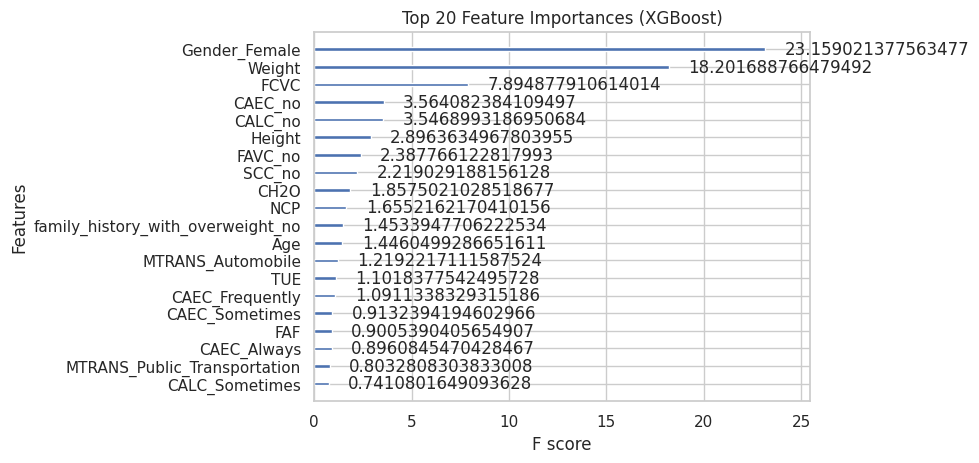

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot top 20 important features
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.show()


The feature importance plot above ranks the model’s features by their relative contribution to the XGBoost model’s predictions, with longer bars indicating more influential features. Understanding these importances is useful because it highlights which factors the model relies on most, aiding interpretability and guiding feature selection. In this case, it’s notable that Gender_Female emerges as the most important feature – a surprising outcome if we expected weight or diet-related features to dominate. Meanwhile, Weight and FCVC (frequency of vegetable consumption) also rank highly, confirming they significantly influence the model’s predictions.

8.3: Confusion Matrix

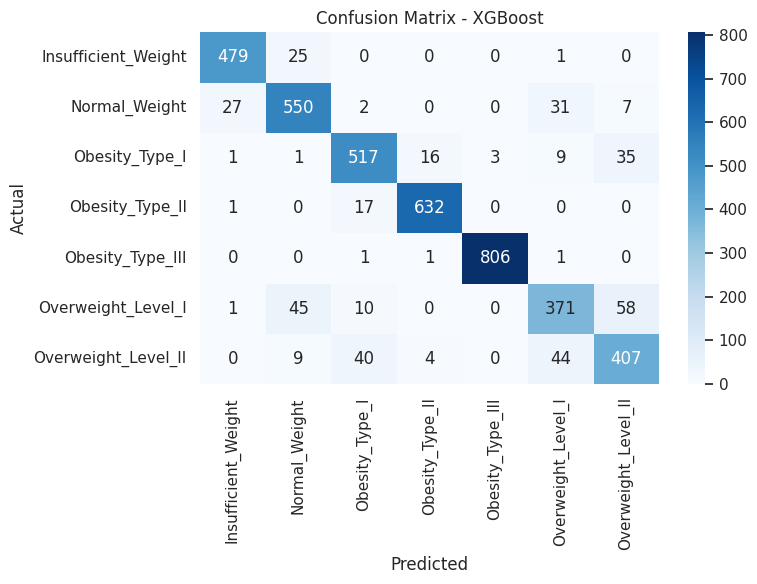

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=target_encoder.classes_, columns=target_encoder.classes_)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


The confusion matrix above visualises how well the XGBoost model distinguishes between obesity risk categories. Most predictions lie along the diagonal, indicating correct classifications. Notably, classes like `Obesity_Type_III` and `Obesity_Type_II` were predicted with high accuracy, while some confusion occurred between `Overweight_Level_I` and `Overweight_Level_II`, which may reflect their similarity in features or borderline cases.


## 9: Make Predictions & Prepare Submission File

In [29]:
# Drop 'id' before prediction
rl_test_encoded_fixed = rl_test_encoded.drop(columns=['id'])

# Predict using XGBoost
test_preds = xgb_model.predict(rl_test_encoded_fixed)

# Decode to original class names
test_preds_labels = target_encoder.inverse_transform(test_preds)

# Create submission file
submission = pd.DataFrame({
    'id': rl_test['id'],  # keep original IDs for Kaggle
    'NObeyesdad': test_preds_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved: submission.csv")
submission.head()


✅ Submission file saved: submission.csv


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


### 📝 Sample Submission Preview

Above are the first few rows of the submission file generated using the final XGBoost model. Each prediction maps an individual `id` to their predicted obesity risk category (`NObeyesdad`).
